<a href="https://colab.research.google.com/github/Riasat38/Estimation-On-Obesity-Levels/blob/main/Obesity_Classification_(CSE422_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [146]:
dataset = pd.read_csv('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

In [147]:
dataset.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


* Entries, Features

In [148]:
dataset.shape

(2111, 17)

In [149]:
dataset.dtypes

,0
Age,float64
Gender,object
Height,float64
Weight,float64
CALC,object
FAVC,object
FCVC,float64
NCP,float64
SCC,object
SMOKE,object


In [150]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


FAVC = Do you eat high caloric food frequently? <br>
FCVC = Do you usually eat vegetables in your meals?<br>
NCP = How many main meals do you have daily?<br>
CAEC = Do you eat any food between meals?<br>
CH2O = How much water do you drink daily?<br>
SCC = Do you monitor the calories you eat daily?<br>
FAF = How often do you have physical activity?<br>
TUE = How much time do you use technological devices such as cell phone, videogames, television, computer and others?<br>
CALC = How often do you drink alcohol? <br>
MTRANS = Which transportation do you usually use?

In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [152]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [153]:
dataset['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


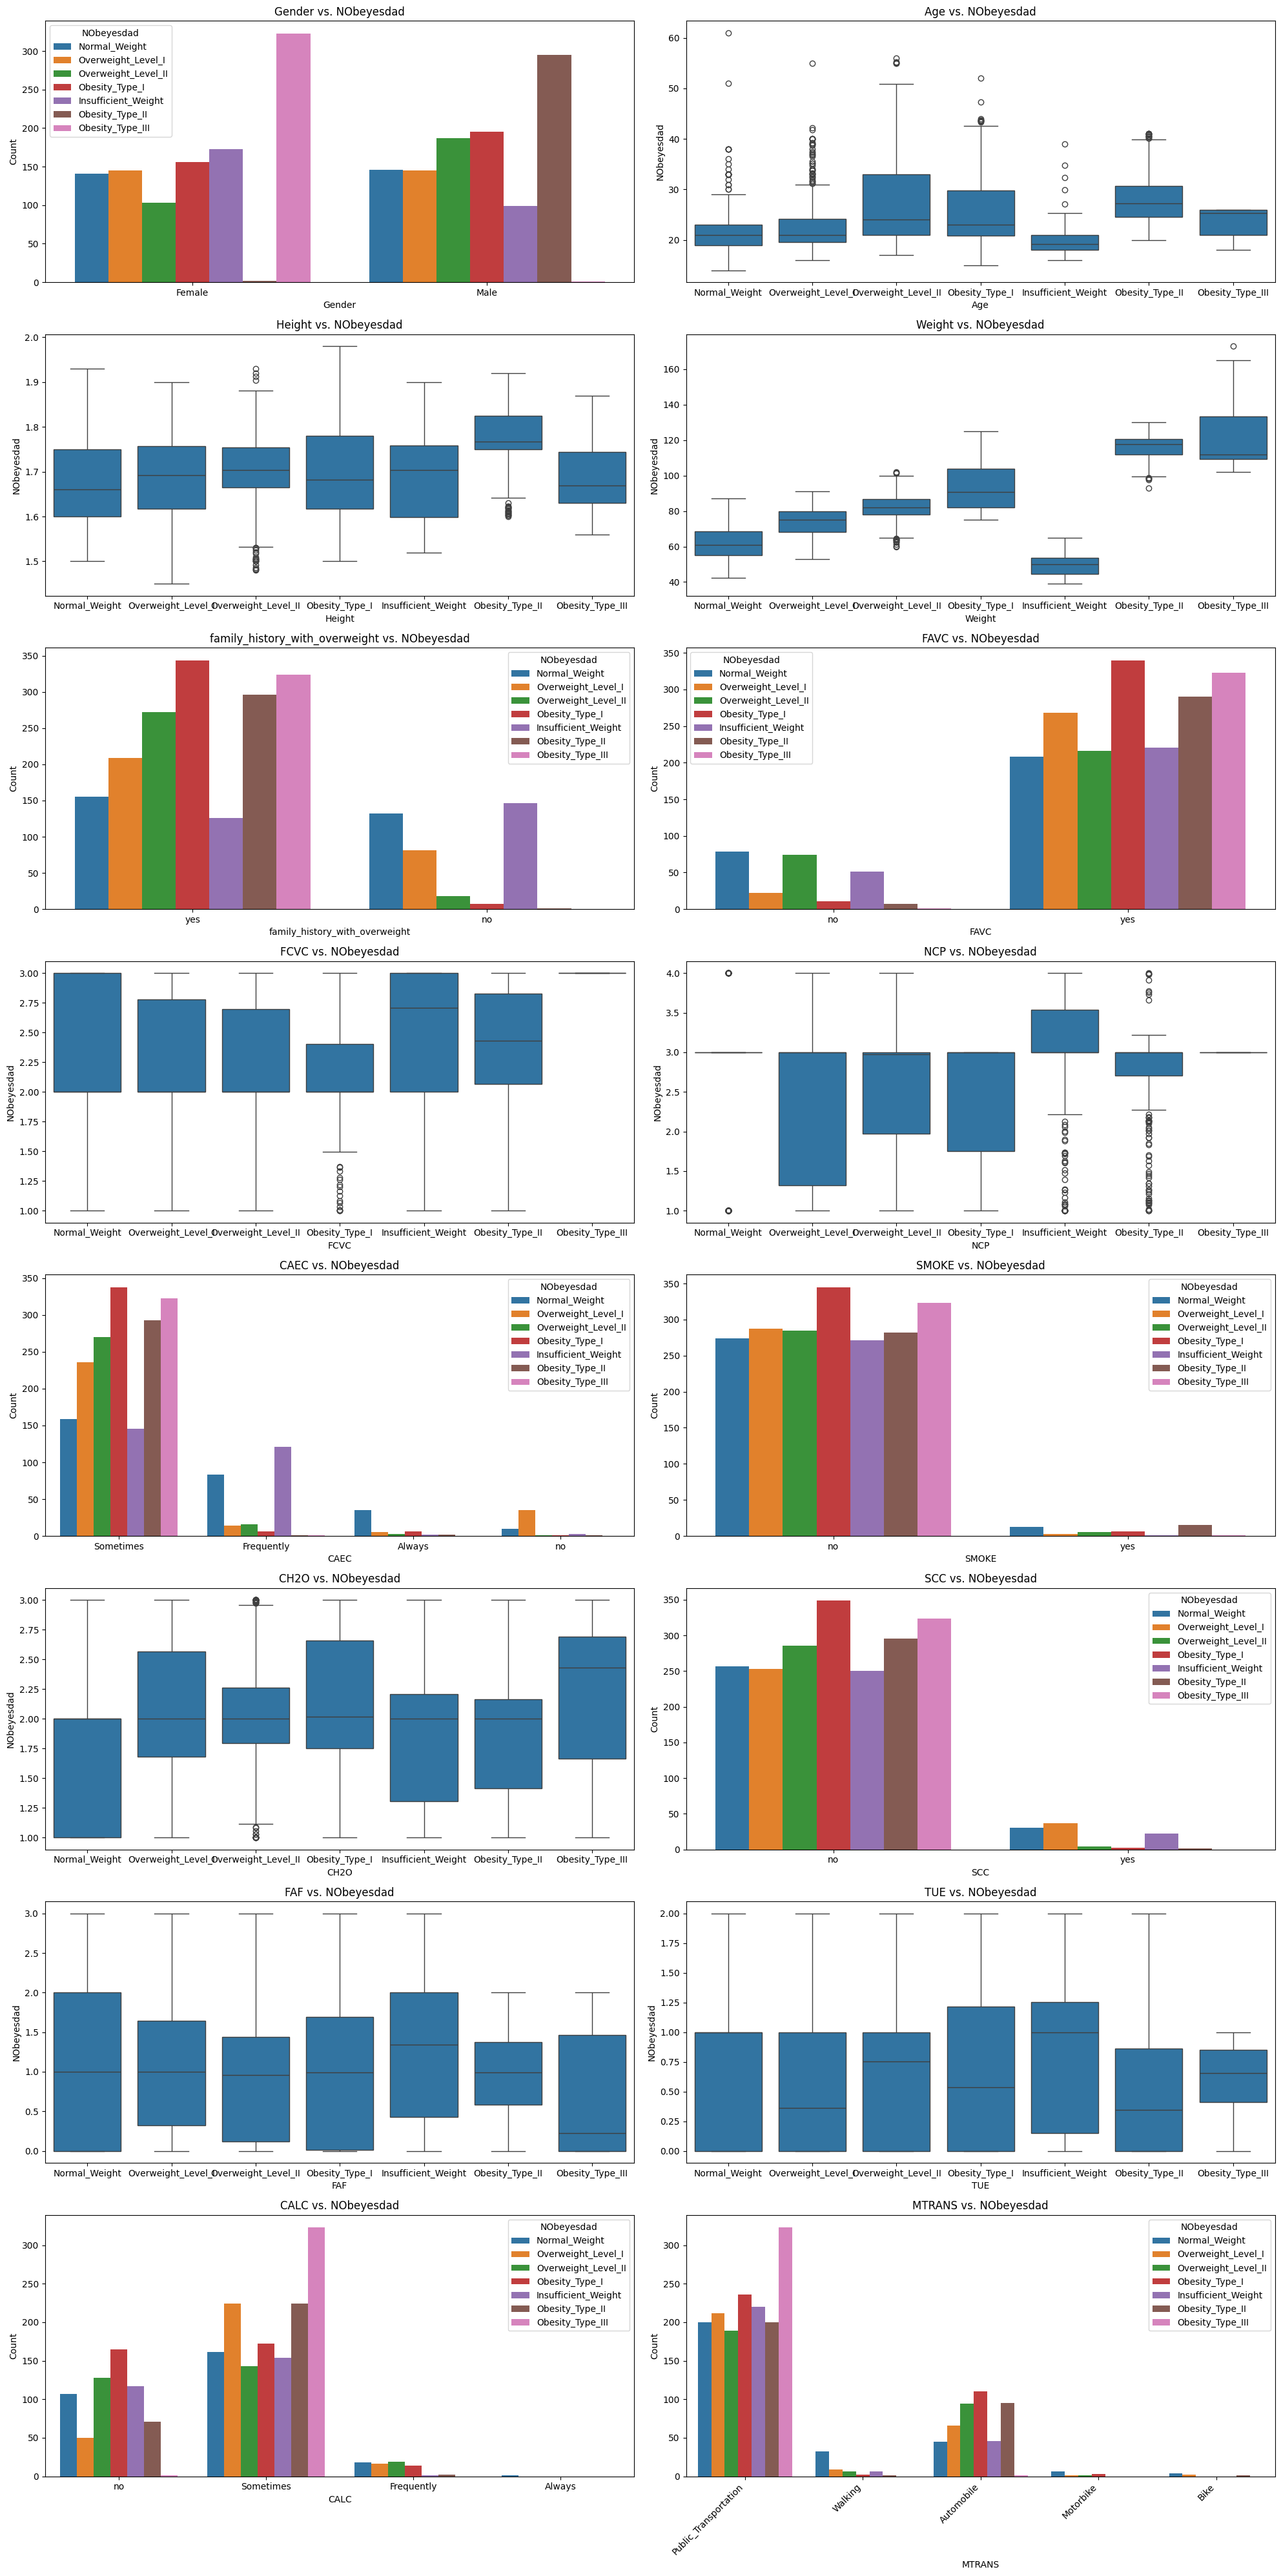

In [154]:

columns_to_compare = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
                      'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']

num_plots = len(columns_to_compare)
rows = (num_plots + 1) // 2
cols = min(num_plots, 2)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.ravel()

for i, col in enumerate(columns_to_compare):
    if dataset[col].dtype == 'object':  # Categorical features
      sns.countplot(x=col, hue='NObeyesdad', data=dataset, ax=axes[i])
    else:  # Numerical features
        sns.boxplot(x='NObeyesdad', y=col, data=dataset, ax=axes[i])

    axes[i].set_title(f'{col} vs. NObeyesdad')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('NObeyesdad' if dataset[col].dtype != 'object' else 'Count')
    plt.xticks(rotation=45, ha='right')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: xlabel='count', ylabel='NObeyesdad'>

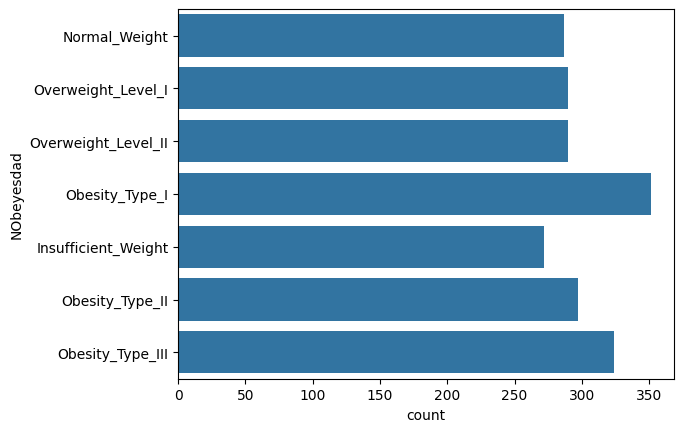

In [155]:
sns.countplot(dataset['NObeyesdad'])

In [156]:
dataset

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [157]:
X = dataset.drop('NObeyesdad', axis=1)
y = dataset['NObeyesdad']

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [159]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


X_train_encoded = encoder.fit_transform(X_train[['CAEC','MTRANS','CALC']])
X_test_encoded = encoder.transform(X_test[['CAEC','MTRANS','CALC']])


feature_names = encoder.get_feature_names_out(['CAEC','MTRANS','CALC'])
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)


X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Drop the original 'CAEC' column
X_train = X_train.drop(['CAEC','MTRANS','CALC'], axis=1)
X_test = X_test.drop(['CAEC','MTRANS','CALC'], axis=1)

## Applying bias as hormonal changes in women is a cause of weight gain

In [160]:
X_train['Gender'] = X_train['Gender'].map({'Male': 0, 'Female': 1})
X_test['Gender'] = X_test['Gender'].map({'Male': 0, 'Female': 1})

## Family history has very styrong correlation to being overweight


In [161]:
X_train['family_history_with_overweight'] = X_train['family_history_with_overweight'].map({'no': 0, 'yes': 1})
X_test['family_history_with_overweight'] = X_test['family_history_with_overweight'].map({'no': 0, 'yes': 1})

##Eating High caloric food also shows strong correlation to overwieght

In [162]:
X_train['FAVC'] = X_train['FAVC'].map({'no': 0, 'yes': 1})
X_test['FAVC'] = X_test['FAVC'].map({'no': 0, 'yes': 1})

## Not tracking calories lead to overeating which shows from the comparison above that it has strong links to being overweight


In [163]:
X_train['SCC'] = X_train['SCC'].map({'no': 1, 'yes': 0})
X_test['SCC'] = X_test['SCC'].map({'no': 1, 'yes': 0})

In [164]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='if_binary') # drop='if_binary' to avoid creating two columns for binary features


X_train_encoded = encoder.fit_transform(X_train[[ 'SMOKE', 'SCC']])
X_test_encoded = encoder.transform(X_test[[ 'SMOKE', 'SCC']])


feature_names = encoder.get_feature_names_out([ 'SMOKE', 'SCC'])
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

X_train = X_train.drop([ 'SMOKE', 'SCC'], axis=1)
X_test = X_test.drop([ 'SMOKE', 'SCC'], axis=1)

In [165]:
X_train.shape

(1477, 26)

In [166]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print("Encoded Labels:", list(le.classes_))

print("\ny_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Encoded Labels: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

y_train shape: (1477,)
y_test shape: (634,)


#Corelation Analysis

Text(0.5, 1.0, 'Analysis of Correlations')

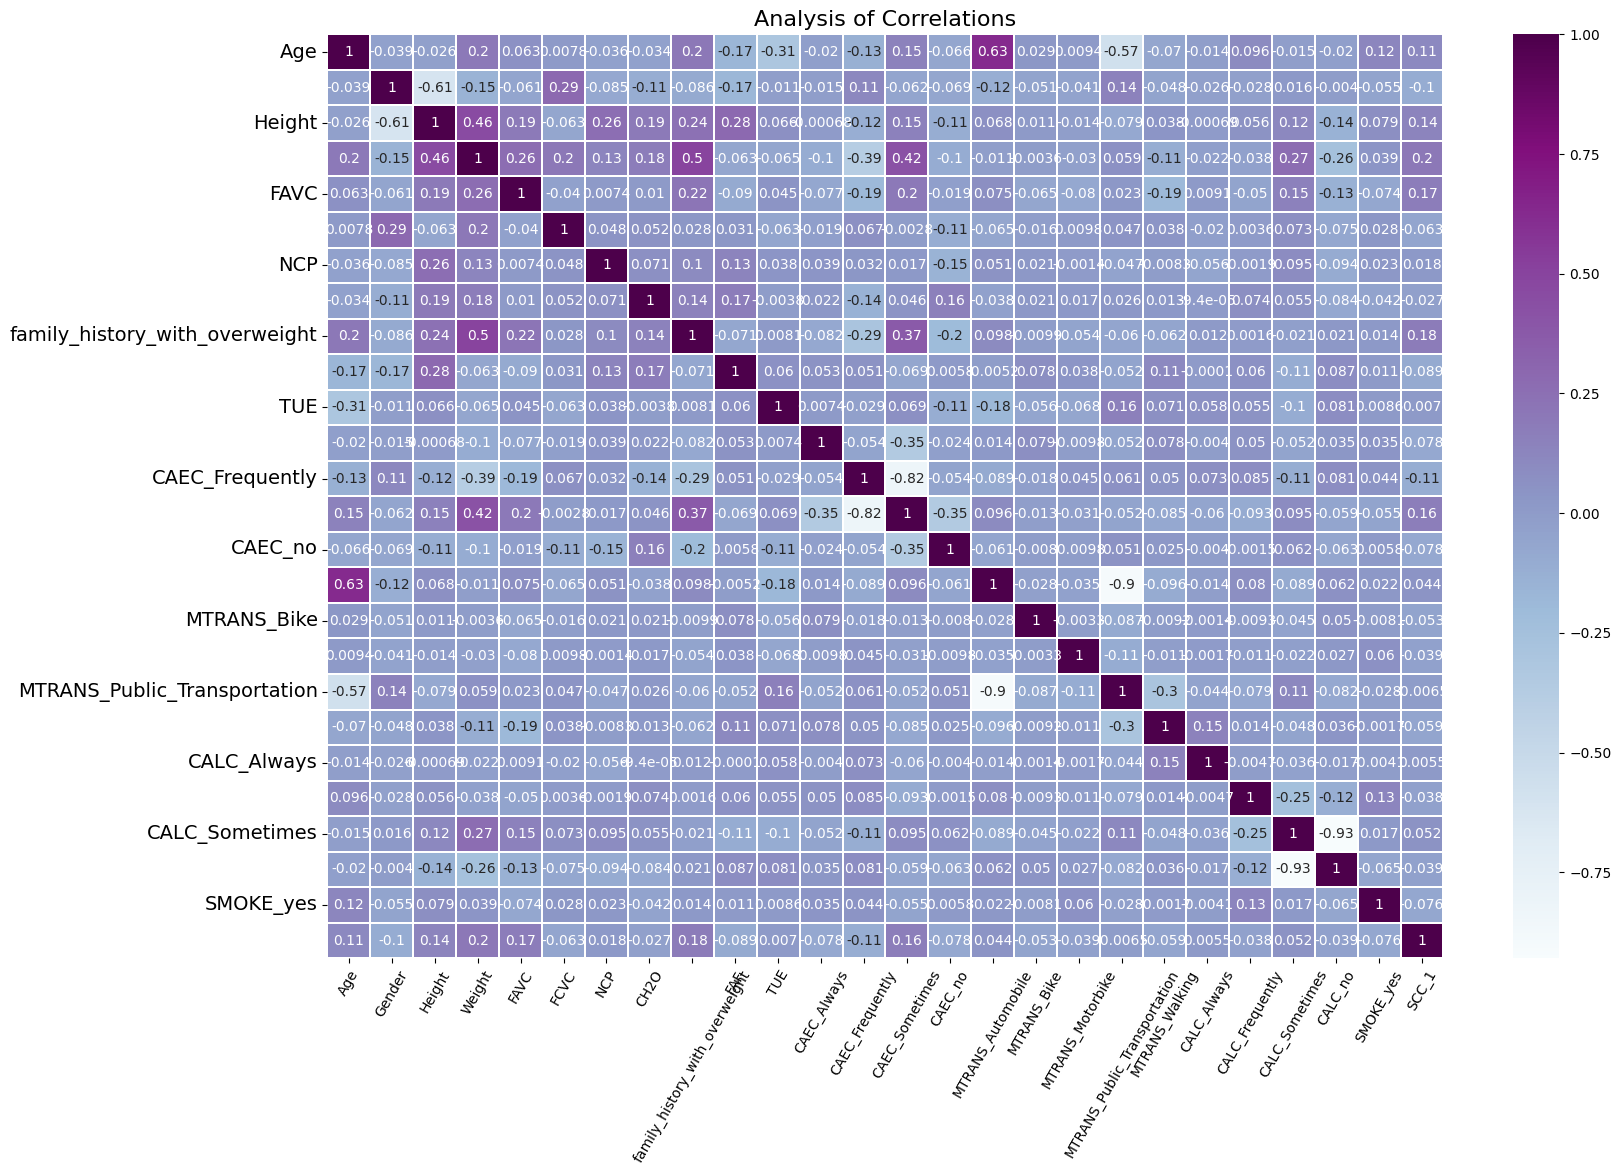

In [167]:
sns.heatmap(X_train.corr(), annot = True, cmap = "BuPu", linewidths= 0.3)
fig = plt.gcf()
fig.set_size_inches(18,12)
plt.xticks(rotation = 60, size = 10)
plt.yticks(size = 14)
plt.title('Analysis of Correlations', size = 16)

As the feature has positively skewed, So log scaling will be a better fit

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train['Age'] = sc.fit_transform(X_train[['Age']])
X_test['Age'] = sc.transform(X_test[['Age']])

X_train['Weight'] = sc.fit_transform(X_train[['Weight']])
X_test['Weight'] = sc.transform(X_test[['Weight']])

In [169]:
X_train

,Age,Gender,Height,Weight,FAVC,FCVC,NCP,CH2O,family_history_with_overweight,FAF,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,SMOKE_yes,SCC_1
1930,0.220875,1,1.627818,0.719123,1,3.000000,3.000000,1.480750,1,0.098043,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1803,0.223582,1,1.656320,0.969880,1,3.000000,3.000000,2.774014,1,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1198,-0.987246,0,1.750097,-0.015543,1,2.907062,3.000000,2.740848,1,1.219827,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15,-0.381832,1,1.700000,-0.800929,0,3.000000,3.000000,2.000000,1,2.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
816,-0.162128,0,1.670227,-0.453961,1,2.000000,3.000000,2.000000,1,0.129163,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.175620,0,1.754956,1.284688,1,2.967300,3.000000,2.530035,1,0.955317,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1095,-0.230479,0,1.718981,-0.196821,1,2.000000,1.729553,1.400247,1,0.887923,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1130,-0.232015,1,1.650000,-0.261201,1,2.000000,3.000000,2.000000,1,0.146919,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1294,-0.230479,1,1.628168,-0.087795,1,2.058687,2.962004,2.010596,1,0.851059,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [171]:
pred = dtc.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(y_test,pred)
print('Accuracy Score:',acc)
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print()
print("Classification Report:\n", classification_report(y_test, pred))

Accuracy Score: 0.9132492113564669

Confusion Matrix:
 [[83  3  0  0  0  0  0]
 [11 73  0  0  0  9  0]
 [ 0  1 94  4  0  0  3]
 [ 0  0  2 86  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0 11  0  0  0 72  5]
 [ 0  0  0  1  0  4 74]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        86
           1       0.83      0.78      0.81        93
           2       0.97      0.92      0.94       102
           3       0.95      0.98      0.96        88
           4       1.00      0.99      0.99        98
           5       0.85      0.82      0.83        88
           6       0.90      0.94      0.92        79

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



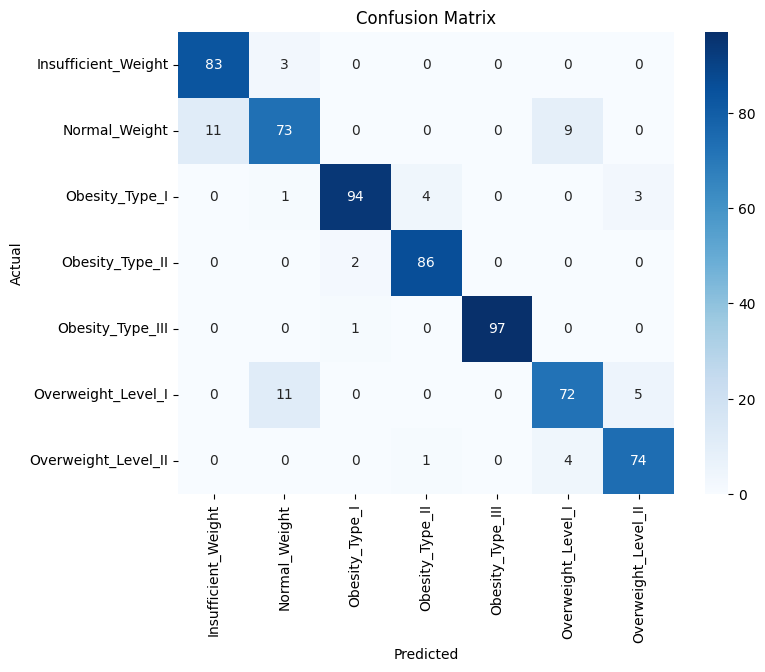

In [173]:
dt = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



#Logistic Regression

In [174]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [175]:
pred2 = lr.predict(X_test)

In [176]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc2 = accuracy_score(y_test,pred2)
print('Accuracy Score:',acc2)
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, pred2))
print()
print("Classification Report:\n", classification_report(y_test, pred2))

Accuracy Score: 0.8264984227129337

Confusion Matrix:
 [[84  2  0  0  0  0  0]
 [17 55  0  0  0 15  6]
 [ 0  0 86 10  1  0  5]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0 10  0  0  0 62 16]
 [ 0  2 12  1  0 12 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        86
           1       0.80      0.59      0.68        93
           2       0.88      0.84      0.86       102
           3       0.88      1.00      0.94        88
           4       0.99      0.99      0.99        98
           5       0.70      0.70      0.70        88
           6       0.66      0.66      0.66        79

    accuracy                           0.83       634
   macro avg       0.82      0.82      0.82       634
weighted avg       0.82      0.83      0.82       634



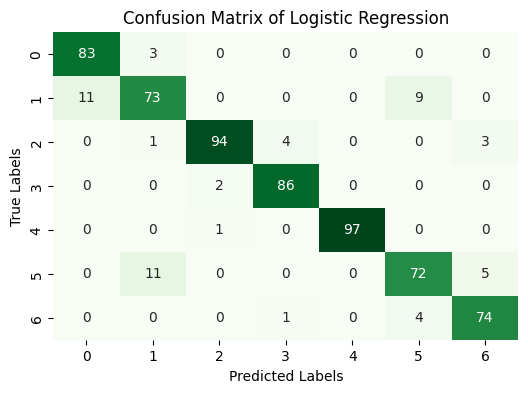

In [177]:
lrm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(lrm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#KNeighbors

In [178]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [179]:
pred3 = knn.predict(X_test)

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc3 = accuracy_score(y_test,pred3)
print('Accuracy Score:\n',acc3)
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, pred3))
print()
print("Classification Report:\n", classification_report(y_test, pred3))

Accuracy Score:
 0.6419558359621451

Confusion Matrix:
 [[77  2  1  0  0  6  0]
 [36 17  7  0  0 20 13]
 [ 0  0 69 21  6  2  4]
 [ 0  0  9 76  3  0  0]
 [ 0  0  0  0 98  0  0]
 [ 7  2 22  2  2 38 15]
 [ 0  0 28  6  3 10 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.90      0.75        86
           1       0.81      0.18      0.30        93
           2       0.51      0.68      0.58       102
           3       0.72      0.86      0.79        88
           4       0.88      1.00      0.93        98
           5       0.50      0.43      0.46        88
           6       0.50      0.41      0.45        79

    accuracy                           0.64       634
   macro avg       0.65      0.64      0.61       634
weighted avg       0.65      0.64      0.61       634



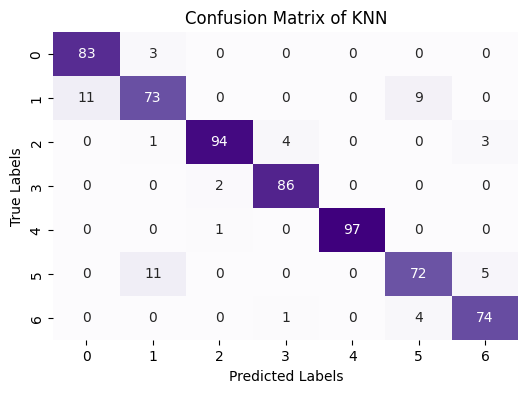

In [181]:

knnc = confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knnc, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix of KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Random Forest

In [182]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, random_state=0)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [183]:

pred4 = rf.predict(X_test)

In [184]:

acc4 = accuracy_score(y_test, pred4)
print('Accuracy Score:\n',acc4)
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, pred4))
print()
print("Classification Report:\n", classification_report(y_test, pred4))

Accuracy Score:
 0.9305993690851735

Confusion Matrix:
 [[81  5  0  0  0  0  0]
 [ 5 83  0  0  0  5  0]
 [ 0  3 97  1  0  0  1]
 [ 0  0  1 87  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0 11  0  0  0 72  5]
 [ 0  3  0  0  0  3 73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        86
           1       0.79      0.89      0.84        93
           2       0.98      0.95      0.97       102
           3       0.99      0.99      0.99        88
           4       1.00      0.99      0.99        98
           5       0.90      0.82      0.86        88
           6       0.92      0.92      0.92        79

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



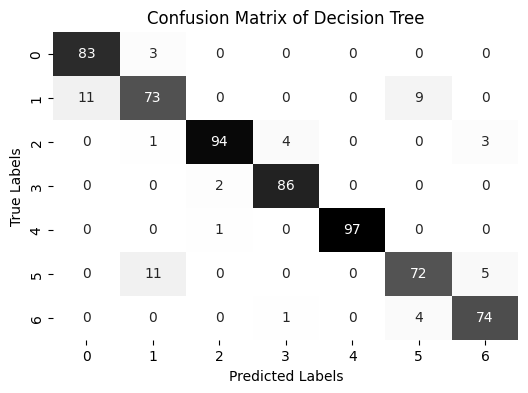

In [185]:
rfc = confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rfc, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## SVM

In [186]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm = SVC(kernel='poly', random_state=42)

svm.fit(X_train, y_train)


SVC(kernel='poly', random_state=42)

In [187]:
pred5 = svm.predict(X_test)

In [188]:
acc5 = accuracy_score(y_test, pred5)
print('SVM Accuracy Score:', acc5)
print()
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, pred5))
print()
print("SVM Classification Report:\n", classification_report(y_test, pred5))

SVM Accuracy Score: 0.862776025236593

SVM Confusion Matrix:
 [[80  6  0  0  0  0  0]
 [14 61  0  0  0 12  6]
 [ 0  1 92  4  0  0  5]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  7  0  0  0 68 13]
 [ 0  0  8  0  0  9 62]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        86
           1       0.81      0.66      0.73        93
           2       0.91      0.90      0.91       102
           3       0.95      0.99      0.97        88
           4       1.00      0.99      0.99        98
           5       0.76      0.77      0.77        88
           6       0.72      0.78      0.75        79

    accuracy                           0.86       634
   macro avg       0.86      0.86      0.86       634
weighted avg       0.86      0.86      0.86       634



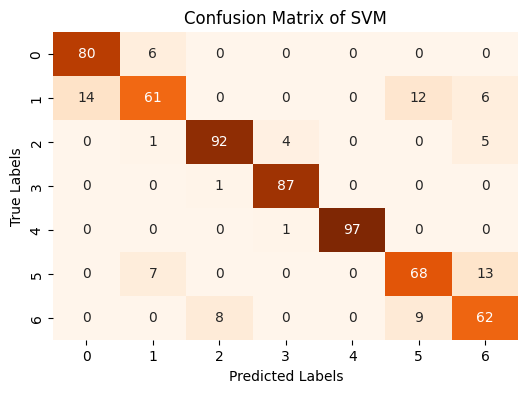

In [189]:
svm_cm = confusion_matrix(y_test, pred5)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix of SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Naive Bayes

In [190]:

from sklearn.naive_bayes import GaussianNB
GaussianClassifier = GaussianNB()
GaussianClassifier.fit(X_train, y_train)

GaussianNB()

In [191]:

pred6 = GaussianClassifier.predict(X_test)

In [192]:

acc6 = accuracy_score(y_test, pred6)
print('Accuracy Score:\n',acc6)
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, pred6))
print()
print("Classification Report:\n", classification_report(y_test, pred6))

Accuracy Score:
 0.5583596214511041

Confusion Matrix:
 [[83  0  0  0  0  3  0]
 [55 16  5  0  0 10  7]
 [ 3  1 56 34  0  4  4]
 [ 0  0  5 82  0  0  1]
 [ 0  0  0  0 97  0  1]
 [25  5 35  6  0 12  5]
 [21  1 37 10  0  2  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.97      0.61        86
           1       0.70      0.17      0.28        93
           2       0.41      0.55      0.47       102
           3       0.62      0.93      0.75        88
           4       1.00      0.99      0.99        98
           5       0.39      0.14      0.20        88
           6       0.31      0.10      0.15        79

    accuracy                           0.56       634
   macro avg       0.55      0.55      0.49       634
weighted avg       0.56      0.56      0.50       634



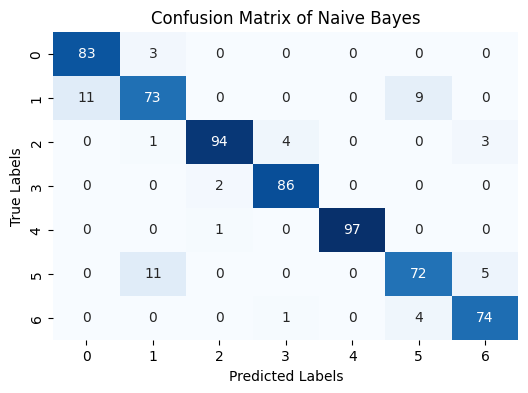

In [193]:
gc = confusion_matrix(y_test, pred6)
plt.figure(figsize=(6, 4))
sns.heatmap(rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Prediction Accuracy chart of the Models

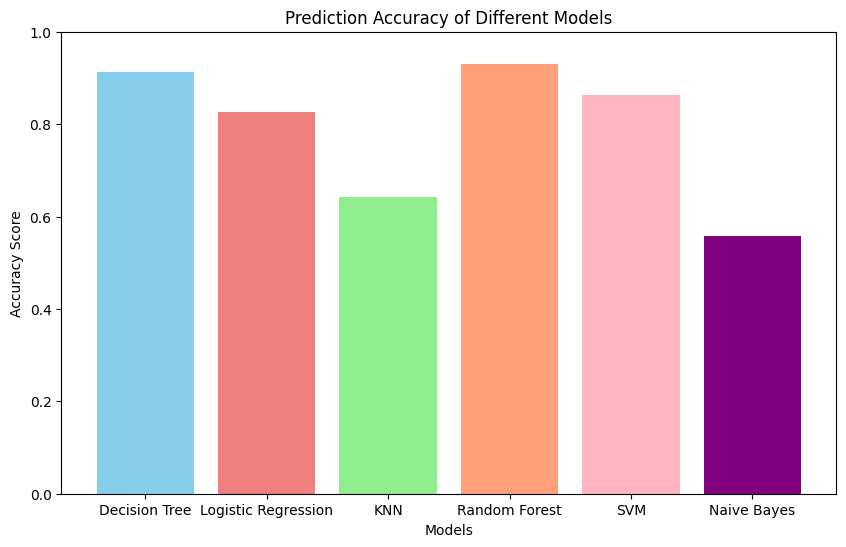

In [194]:
models = ['Decision Tree', 'Logistic Regression', 'KNN', 'Random Forest', 'SVM','Naive Bayes']
accuracy_scores = [acc,acc2,acc3,acc4,acc5,acc6]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightpink', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Prediction Accuracy of Different Models")
plt.ylim(0, 1)
plt.show()

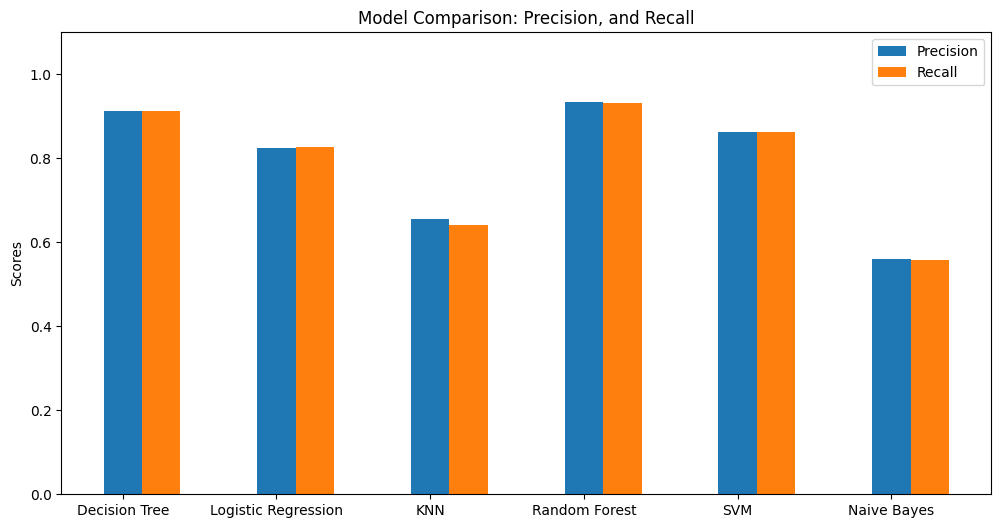

In [195]:
from sklearn.metrics import  confusion_matrix, precision_score, recall_score
precision_dt = precision_score(y_test, pred, average='weighted')
recall_dt = recall_score(y_test, pred, average='weighted')

precision_lr = precision_score(y_test, pred2, average='weighted')
recall_lr = recall_score(y_test, pred2, average='weighted')

precision_knn = precision_score(y_test, pred3, average='weighted')
recall_knn = recall_score(y_test, pred3, average='weighted')


precision_rf = precision_score(y_test, pred4, average='weighted')
recall_rf = recall_score(y_test, pred4, average='weighted')

precision_svm = precision_score(y_test, pred5, average='weighted')
recall_svm = recall_score(y_test, pred5, average='weighted')

precision_nb = precision_score(y_test, pred6, average='weighted')
recall_nb = recall_score(y_test, pred6, average='weighted')

models = ['Decision Tree', 'Logistic Regression', 'KNN', 'Random Forest', 'SVM','Naive Bayes']
precision_scores = [precision_dt, precision_lr, precision_knn, precision_rf, precision_svm, precision_nb]
recall_scores = [recall_dt, recall_lr, recall_knn, recall_rf, recall_svm, recall_nb]


x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x, precision_scores, width, label='Precision')
rects2 = ax.bar(x + width, recall_scores, width, label='Recall')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Precision, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0, 1.1)

plt.show()